# Clustering Analysis: K Means

Quintessentially, the relationship between sales opportunity and reducing waste is a crucial deterministic factor in delivering profit. 
An ideal model for M&S is for all products across all stores to deliver maximum sales potential with low waste generated.  Whilst this is a simple and neat statement, however, in reality, delivering such a model is problematic and complex. This analysis will explore this relationship.

### Framing the Data Question 
Explore and determine commonality clustering between lost sales opportunity and waste across a 12 month period by day, store, SPC using K- Means


### Metrics

-  Lost Sales Opportunity- Calculated using demand forecast and sales profile, extrapolated from the last sale of the product. This will be displayed in £GBP and will be aggregated appropriately. 

-  Waste- This is on shelf value of a product (£GBP) that has been declared as waste product as it is either due to expire beyond its lifespan or has already expired. In the instance of the former, there is an instore process to recover sales from this product through applying a reduction to the product’s price. In the latter, the product is immediately disposed of. 

### Domain knowledge expectations

Before sourcing and exploring the data, below are some expectations and considerations that may could occur: 
-	 Seasonality and the impact of weather 
-	Despite a prescript set of store processes, delivery will differ from store to store
-	M&S reliance on eventing periods i.e. Christmas could skew results 


### Contents

-  [Importing the libraries](#Importing-the-libraries)



## Importing the libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import scale
%matplotlib inline
from datetime import datetime

## Sourcing and importing the data

The data required has been sourced from existing M&S approved data sources and was extracted using the Tibco Spotfire tool.

Before bringing the data into Jupyter, initial inspections revealed that there are 40 million rows of data, as the exract covers 363 days and the entire main chain estate. With this considered, I will begin the analysis with one store and then build up to include more

Data Integrity- No customer or personal information is held in this data extract 

In [78]:
DF= pd.read_csv("Desktop/Decoded Data Sources/Python/Cluster.csv")
DF.head()

,CALENDAR_ID,GEOGRAPHY_ID,Sum(WASTE_VALUE_GBP),Sum(Lost Opp >0)
0,20180409,438,5150.87,2980.37
1,20180410,438,4577.15,3612.02
2,20180411,438,4976.61,2582.13
3,20180412,438,3680.91,2912.13
4,20180413,438,3250.87,3400.23


In [80]:
DF.columns

Index(['CALENDAR_ID', 'GEOGRAPHY_ID', 'Sum(WASTE_VALUE_GBP)',
       'Sum(Lost Opp >0)'],
      dtype='object')

There are four columns with the data frame

-  CALENDAR_ID- The date
-  GEOGRAPHY_ ID- The Store
-  Sum(WASTE_VALUE_GBP)- Waste 
-  Sum(Lost Opp >0)-Opportunity

In [81]:
DF.columns = ['Date','Store','Waste','Opportunity']
DF.head()

,Date,Store,Waste,Opportunity
0,20180409,438,5150.87,2980.37
1,20180410,438,4577.15,3612.02
2,20180411,438,4976.61,2582.13
3,20180412,438,3680.91,2912.13
4,20180413,438,3250.87,3400.23


In [82]:
DF.columns

Index(['Date', 'Store', 'Waste', 'Opportunity'], dtype='object')

In [83]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
Date           363 non-null int64
Store          363 non-null int64
Waste          363 non-null float64
Opportunity    363 non-null float64
dtypes: float64(2), int64(2)
memory usage: 11.4 KB


The data is in a relatively clean state. I have renamed the columns to one word to prevent any problems with Python later in the analysis. 

I am not satisfied with the format of the date which is currently stored as an integer, so I will attempt to transform this to a more traditional date format. 

## Visualising the Data


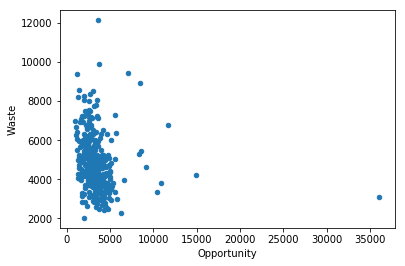

In [101]:
contents.plot.scatter(x ='Opportunity', y ='Waste')
labels = {'Date'}

## Initial Refinement- Elbow Curve

Below I have used an elbow curve to determine the number of centroid clusters to use within my K- Means

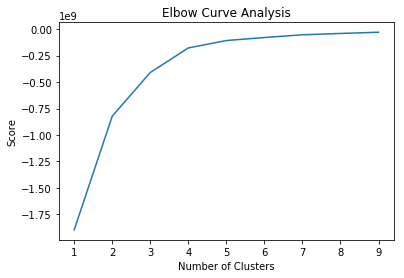

In [85]:
x = contents[['Waste']]
y = contents[['Opportunity']]

num_clusters = [1,2,3,4,5,6,7,8,9]
kmeans = [ KMeans(n_clusters=i) for i in num_clusters ]
score = [ kmeans[i-1].fit(y).score(y)for i in num_clusters ]

plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve Analysis')
plt.show()

## Applying K-means

In [89]:
data = []
for index, row in contents.iterrows():
    Opportunity = row['Opportunity']
    Waste = row['Waste']
    data.append( [float(Opportunity), float(Waste)] )
    
model = KMeans(n_clusters=6)
model.fit(scale(data))

contents['cluster'] = model.labels_.astype(float)

## Visualising K-means

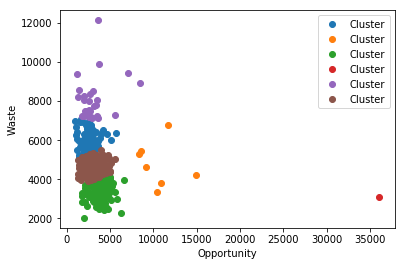

In [98]:
groups = contents.groupby('cluster')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.Opportunity,group.Waste, marker='o', linestyle='', label='Cluster')
    
plt.xlabel('Opportunity')
plt.ylabel('Waste')
ax.legend()